## Segundo Desafío: `Daruich`, Nicolas Alberto
----

In [108]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
main_df = pd.read_csv('metabolicSyndrome.csv')

In [110]:
main_df.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0


In [111]:
# Eliminando la columna 'seqn'
main_df.drop(labels='seqn', axis='columns', inplace=True)

----
----
### Graficos: `Matplotlib`

----
### `Barchar`: Participants

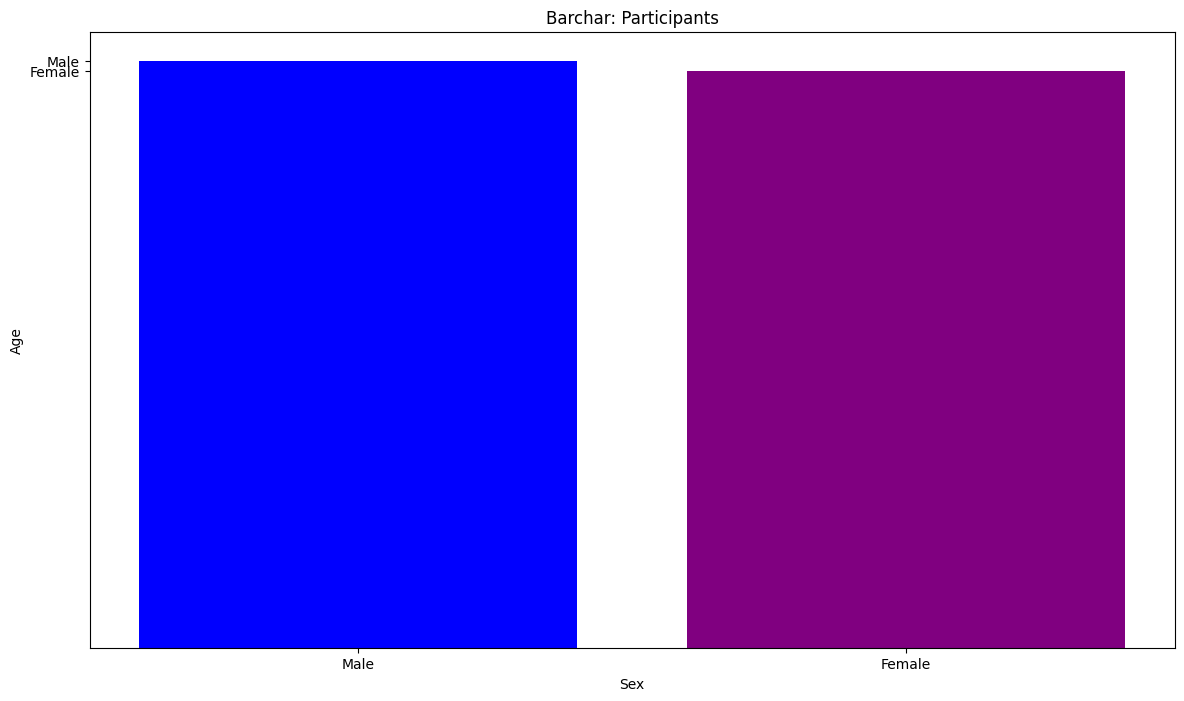

In [112]:
values_female = main_df['Sex'][main_df['Sex'] == 'Female'].count()
values_male = main_df['Sex'][main_df['Sex'] == 'Male'].count()

labels = main_df['Sex'].unique()
color = ['blue', 'purple']

fig, ax = plt.subplots(figsize = (14,8))
ax.bar(labels, [values_female, values_male], color=color)

ax.set_yticks([values_female, values_male], labels=['Male', 'Female'])
ax.yaxis_inverted()

ax.set_title('Barchar: Participants')
ax.set_xlabel('Sex'), ax.set_ylabel('Age');

En el estudio, la proporcion de hombres y mujeres es practicamente la misma

----
### `Boxplot`: Sex by Age

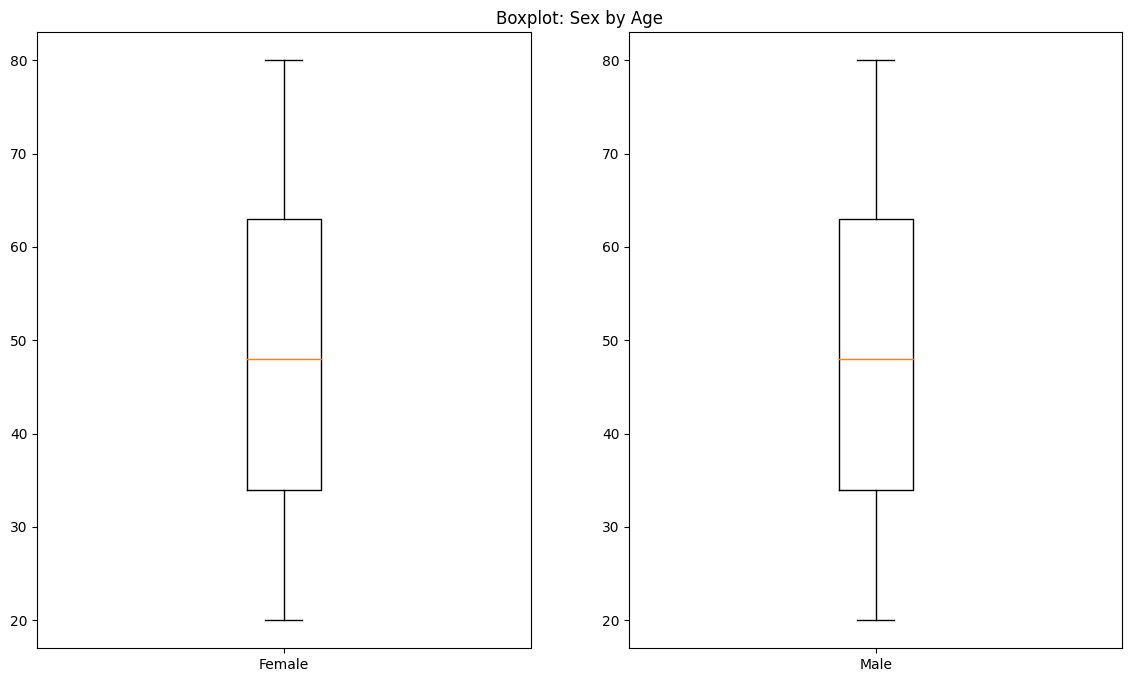

In [113]:
values_female = main_df['Age'][main_df['Sex']=='Female']
values_male = main_df['Age'][main_df['Sex']=='Male']

fig, ax = plt.subplots(figsize = (14,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.boxplot(values_female, positions=[1], labels=['Female'])
ax2.boxplot(values_male, positions=[2], labels=['Male'])

ax.set_title('Boxplot: Sex by Age')
ax.set_xlabel('Sex'), ax.set_ylabel('Age')
ax.axis(False);

La dispersion de la edad es similar para ambos sexos. El 50 % de de los participantes tienen entre 35 y 65 años, y la totalidad se encuentra entre los 20 y 80 años.

----
### `Pie`: Marital by Sex

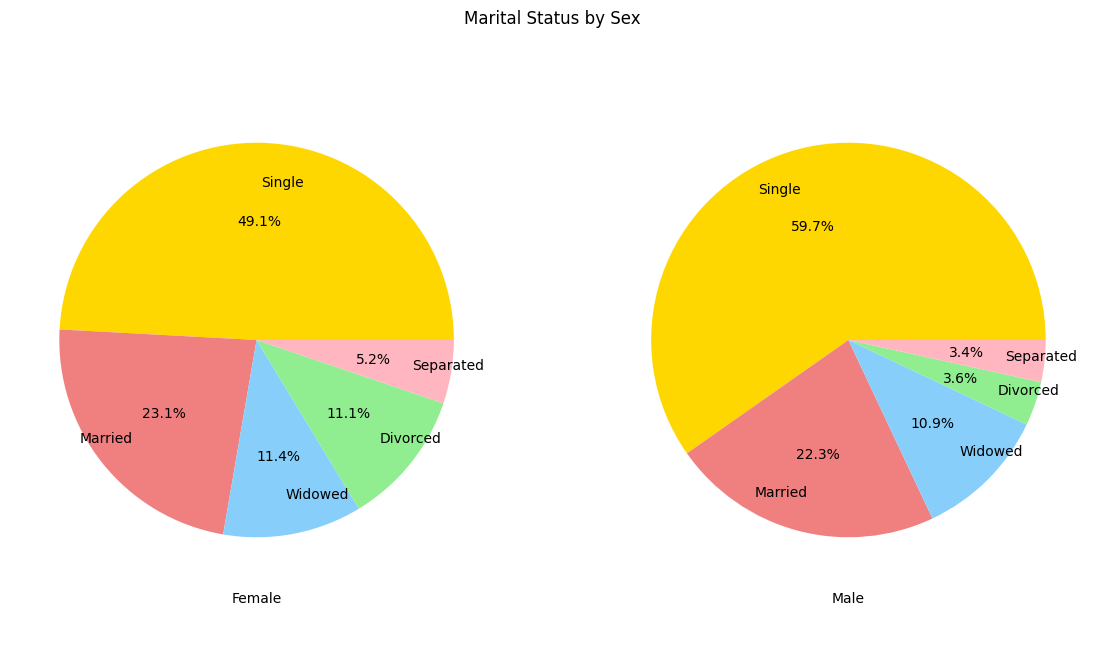

In [114]:
values_female = main_df['Marital'][main_df['Sex']=='Female'].value_counts()
values_male = main_df['Marital'][main_df['Sex']=='Male'].value_counts()

labels = ['Single', 'Married', 'Widowed', 'Divorced', 'Separated']
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightpink']

fig, ax = plt.subplots(figsize = (14,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax.set_title('Marital Status by Sex')
ax.axis(False)

ax1.set_xlabel('Female')
ax2.set_xlabel('Male')

labeldistance = 0.8
ax1.pie(values_female, labels=labels, colors=colors, autopct='%1.1f%%', labeldistance=labeldistance)
ax2.pie(values_male, labels=labels, colors=colors, autopct='%1.1f%%', labeldistance=labeldistance);

Si bien en ambos casos hay un predominio de solteros, esto es mas pronunciado entre los hombres. En el caso de las mujeres, destaca el porcentaje de divorciadas, que es 3 veces superior al de los hombres.

----
----
### Graficos: `Seaborn`

----
### `Displot`: Sex & Metabolic Syndrome

c:\Users\nical\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


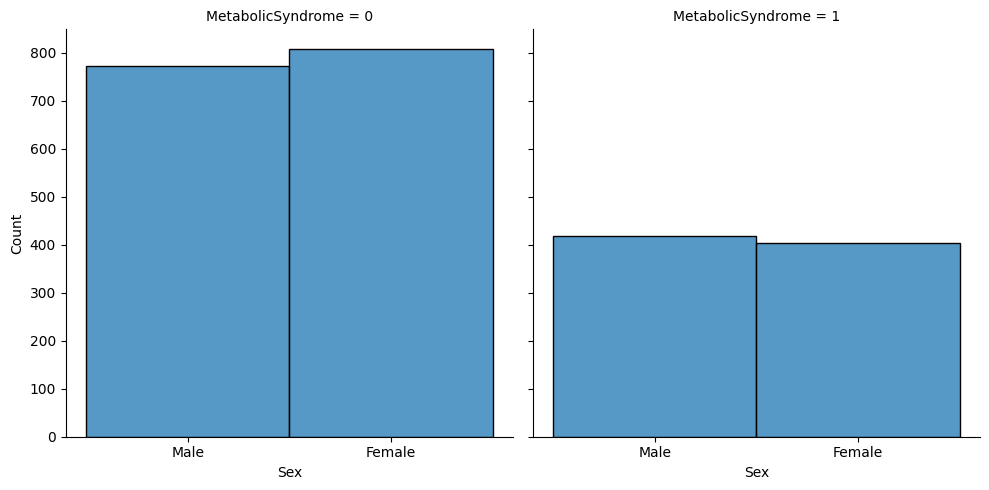

In [200]:
sns.displot(main_df, x = 'Sex', col='MetabolicSyndrome')

Hay una ligera diferencia a favor de las mujeres en el recuento de pacientes sin sindrome metabolico. Cuando este existe, la diferencia, tambien minima, esta a favor de los hombres.

----
### `Scatter Plot`: Age, Waist Circunference and Sex

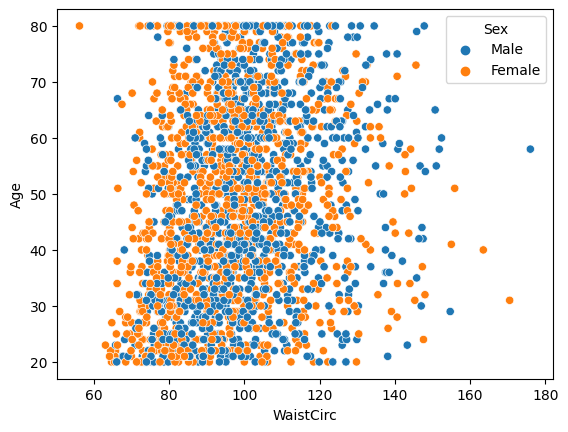

In [197]:
sns.scatterplot(main_df, y = 'Age', x = 'WaistCirc', hue='Sex');

El grueso de los pacientes se aglutina en el rango de circunferencia abdominal de 60 a 120. Por el grafico, no parece haber otras tendencias facilmente observables.

----
### `Box Plot`: Blood Glucose & Sex

<Axes: xlabel='BloodGlucose', ylabel='Sex'>

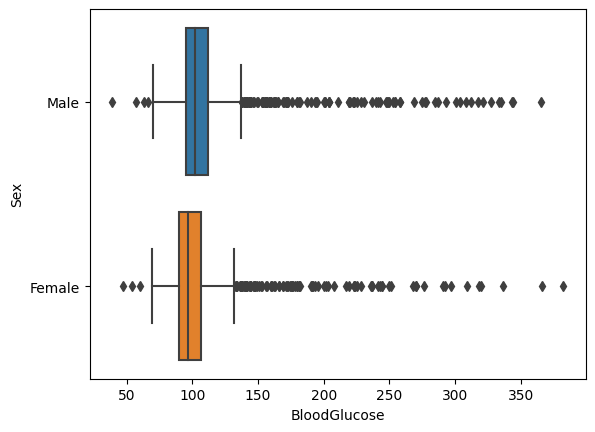

In [199]:
sns.boxplot(main_df, x = 'BloodGlucose', y = 'Sex')

La dispersion de los pacientes parece similar para ambos sexos, con el 50 % contenido en torno a los 100 mg/dL. El resto se deposita entre 75 y 125. Tambien se observa un porcentaje minimo de outliers, que representan los valores extremos.